In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import data_fcts as df

In [2]:
exp_folder = "/home/leni/are-logs/meim/"


meim_17_1_7-45-12-2387-2572308948
meim_16_1_16-19-30-833-304159131
meim_17_1_8-47-58-8871-3389213187
meim_17_1_8-15-22-2985-3931412095
meim_17_1_8-53-59-9213-1154183952
plotting


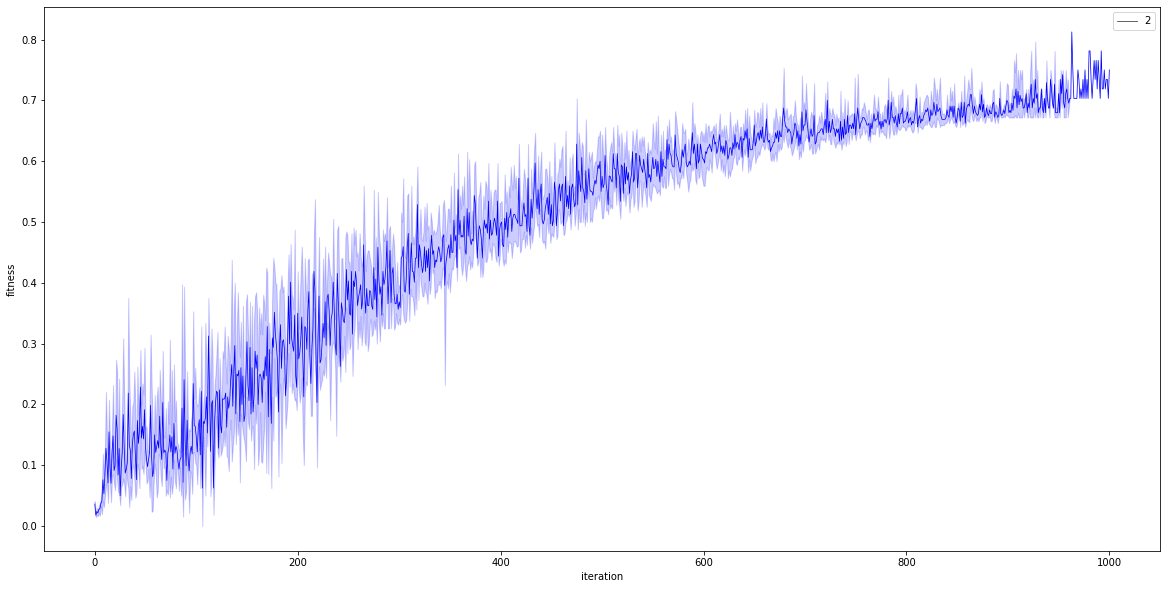

In [9]:
parent_fits = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, deltas = df.load_fitness(exp_folder + "/" + folder + "/fitness2.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.parent_pool_fitnesses(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","replicate"])



<Axes: xlabel='iteration', ylabel='fitness'>

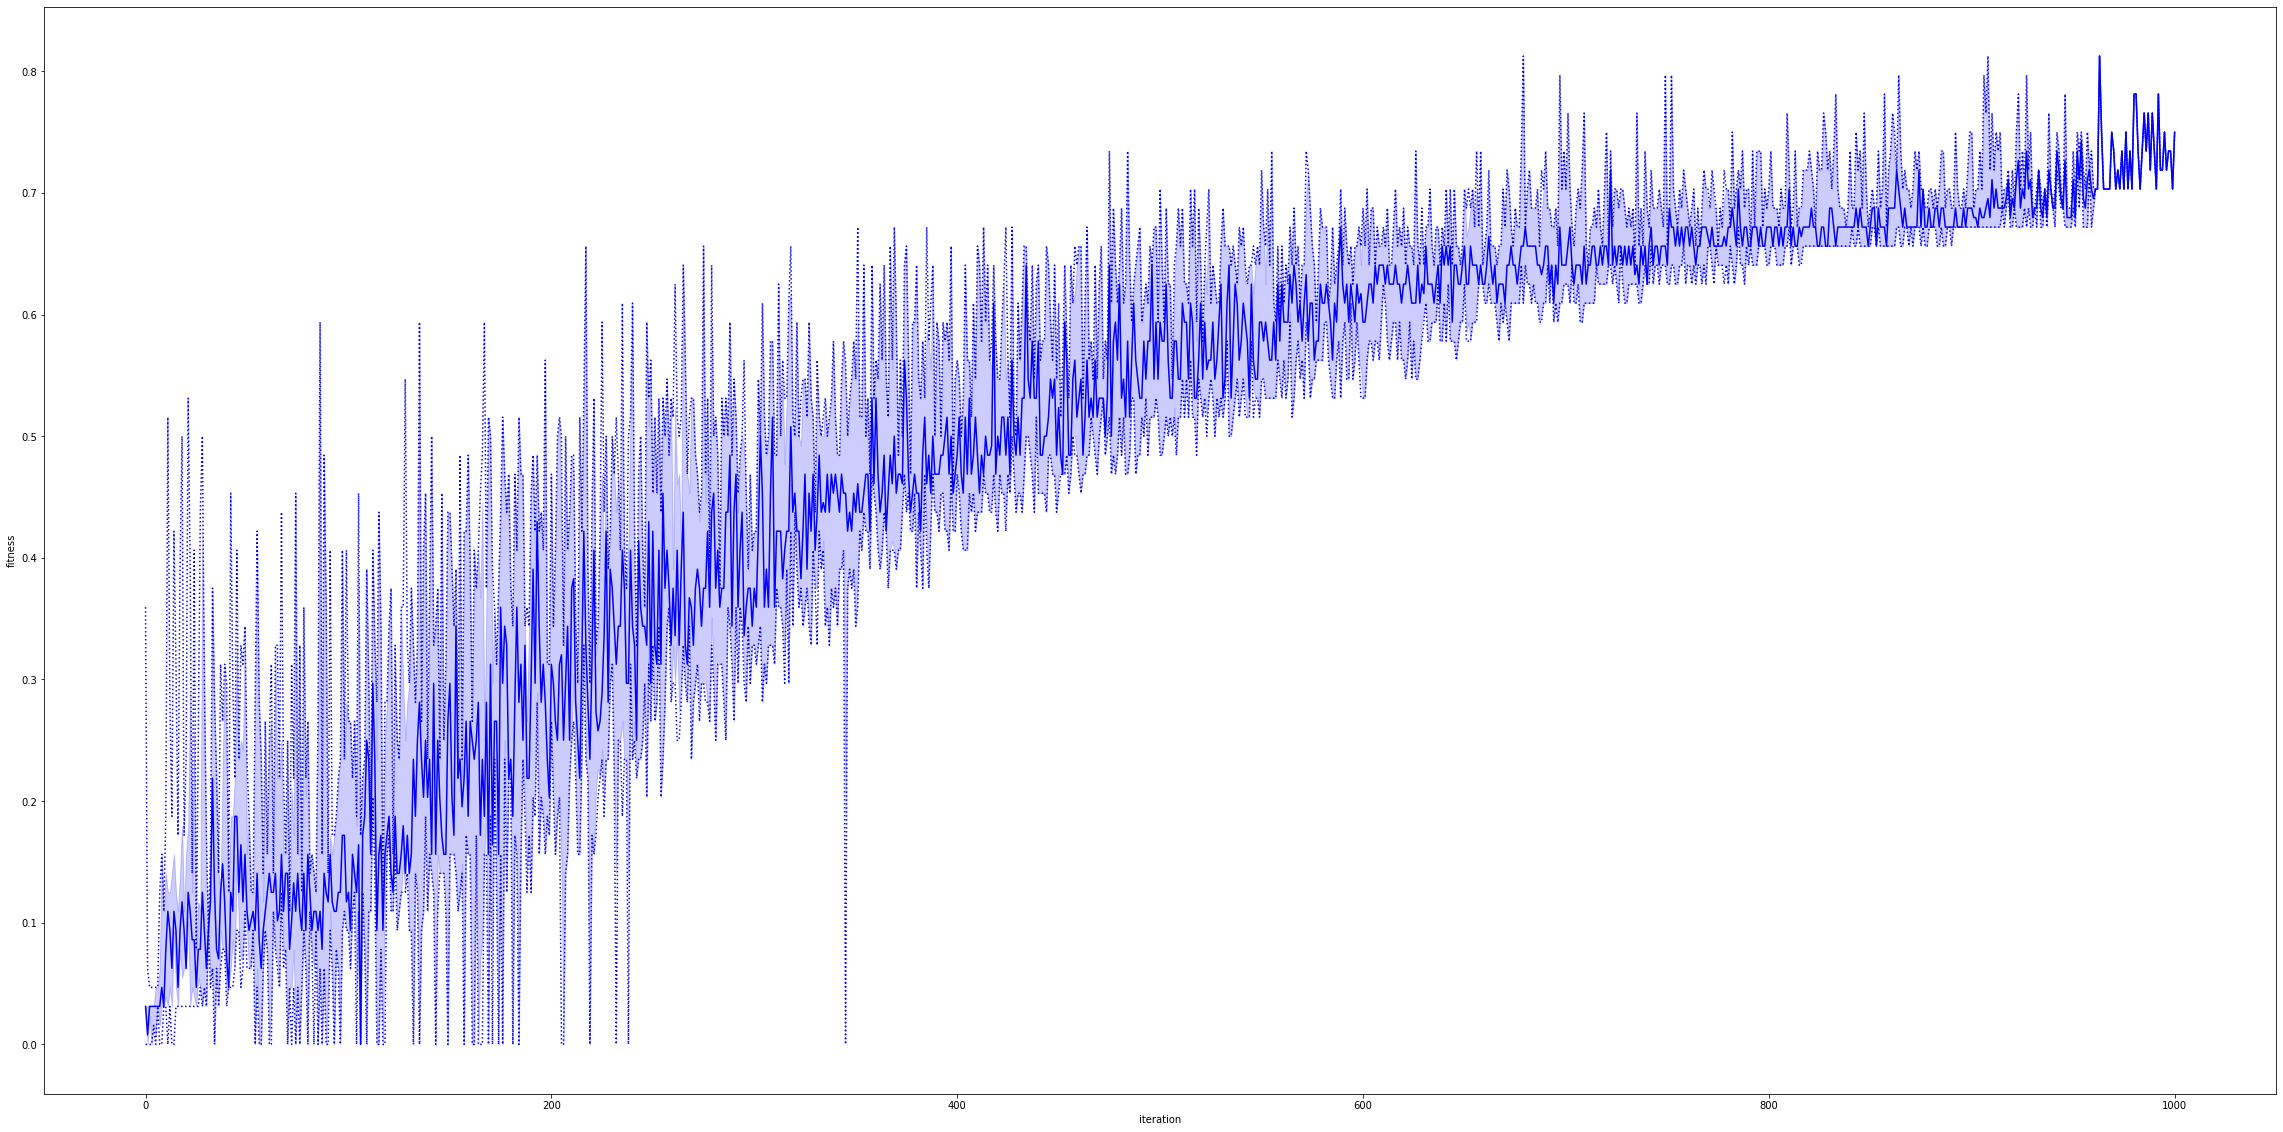

In [24]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.lineplot(data=par_fit_data,x="iteration",y="fitness",estimator=np.median,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')



In [5]:
parent_descs = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_descriptor(exp_folder + "/" + folder + "/morph_descriptors.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])


meim_17_1_7-45-12-2387-2572308948
meim_16_1_16-19-30-833-304159131
meim_17_1_8-47-58-8871-3389213187
meim_17_1_8-15-22-2985-3931412095
meim_17_1_8-53-59-9213-1154183952


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x1440 with 0 Axes>

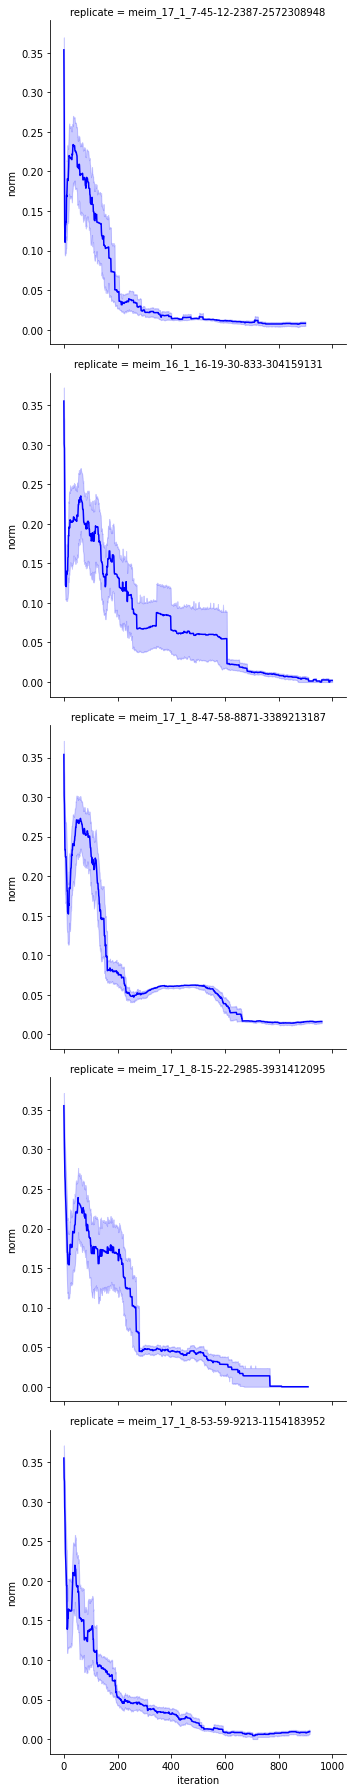

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.relplot(data=par_desc_data,kind="line",x="iteration",y="norm",estimator=np.std,color='b',row="replicate")

In [66]:
new_data_list = []
for rep in par_desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = par_desc_data.loc[par_desc_data["replicate"]==rep]
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)


meim_17_1_7-45-12-2387-2572308948
meim_16_1_16-19-30-833-304159131
meim_17_1_8-47-58-8871-3389213187
meim_17_1_8-15-22-2985-3931412095
meim_17_1_8-53-59-9213-1154183952


In [70]:
#std_data.reset_index()
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index         width     depth        height  \
0             0    29.011492  1.329468e-01  0.123097  1.189175e-01   
1             1    43.269896  1.347567e-01  0.125652  1.095078e-01   
2             2    55.390969  1.347567e-01  0.125652  9.436249e-02   
3             3    58.485996  1.343828e-01  0.125534  9.346514e-02   
4             4    59.988964  1.343829e-01  0.125473  9.163068e-02   
...         ...          ...           ...       ...           ...   
4687        912  3082.113244  2.726599e-07  0.002479  2.564324e-07   
4688        913  3101.835597  2.726599e-07  0.002479  2.564324e-07   
4689        914  3121.893267  2.726599e-07  0.002615  2.564324e-07   
4690        915  3141.757610  2.726599e-07  0.002615  2.564324e-07   
4691        916  3162.020055  2.726599e-07  0.002615  2.564324e-07   

            voxels    wheels   sensors    joints   casters      norm  \
0     3.435290e-01  0.055888  0.098559  0.132954  0.134622  0.353814   
1     3.443236e

Text(0, 0.5, 'Morphological diversity')

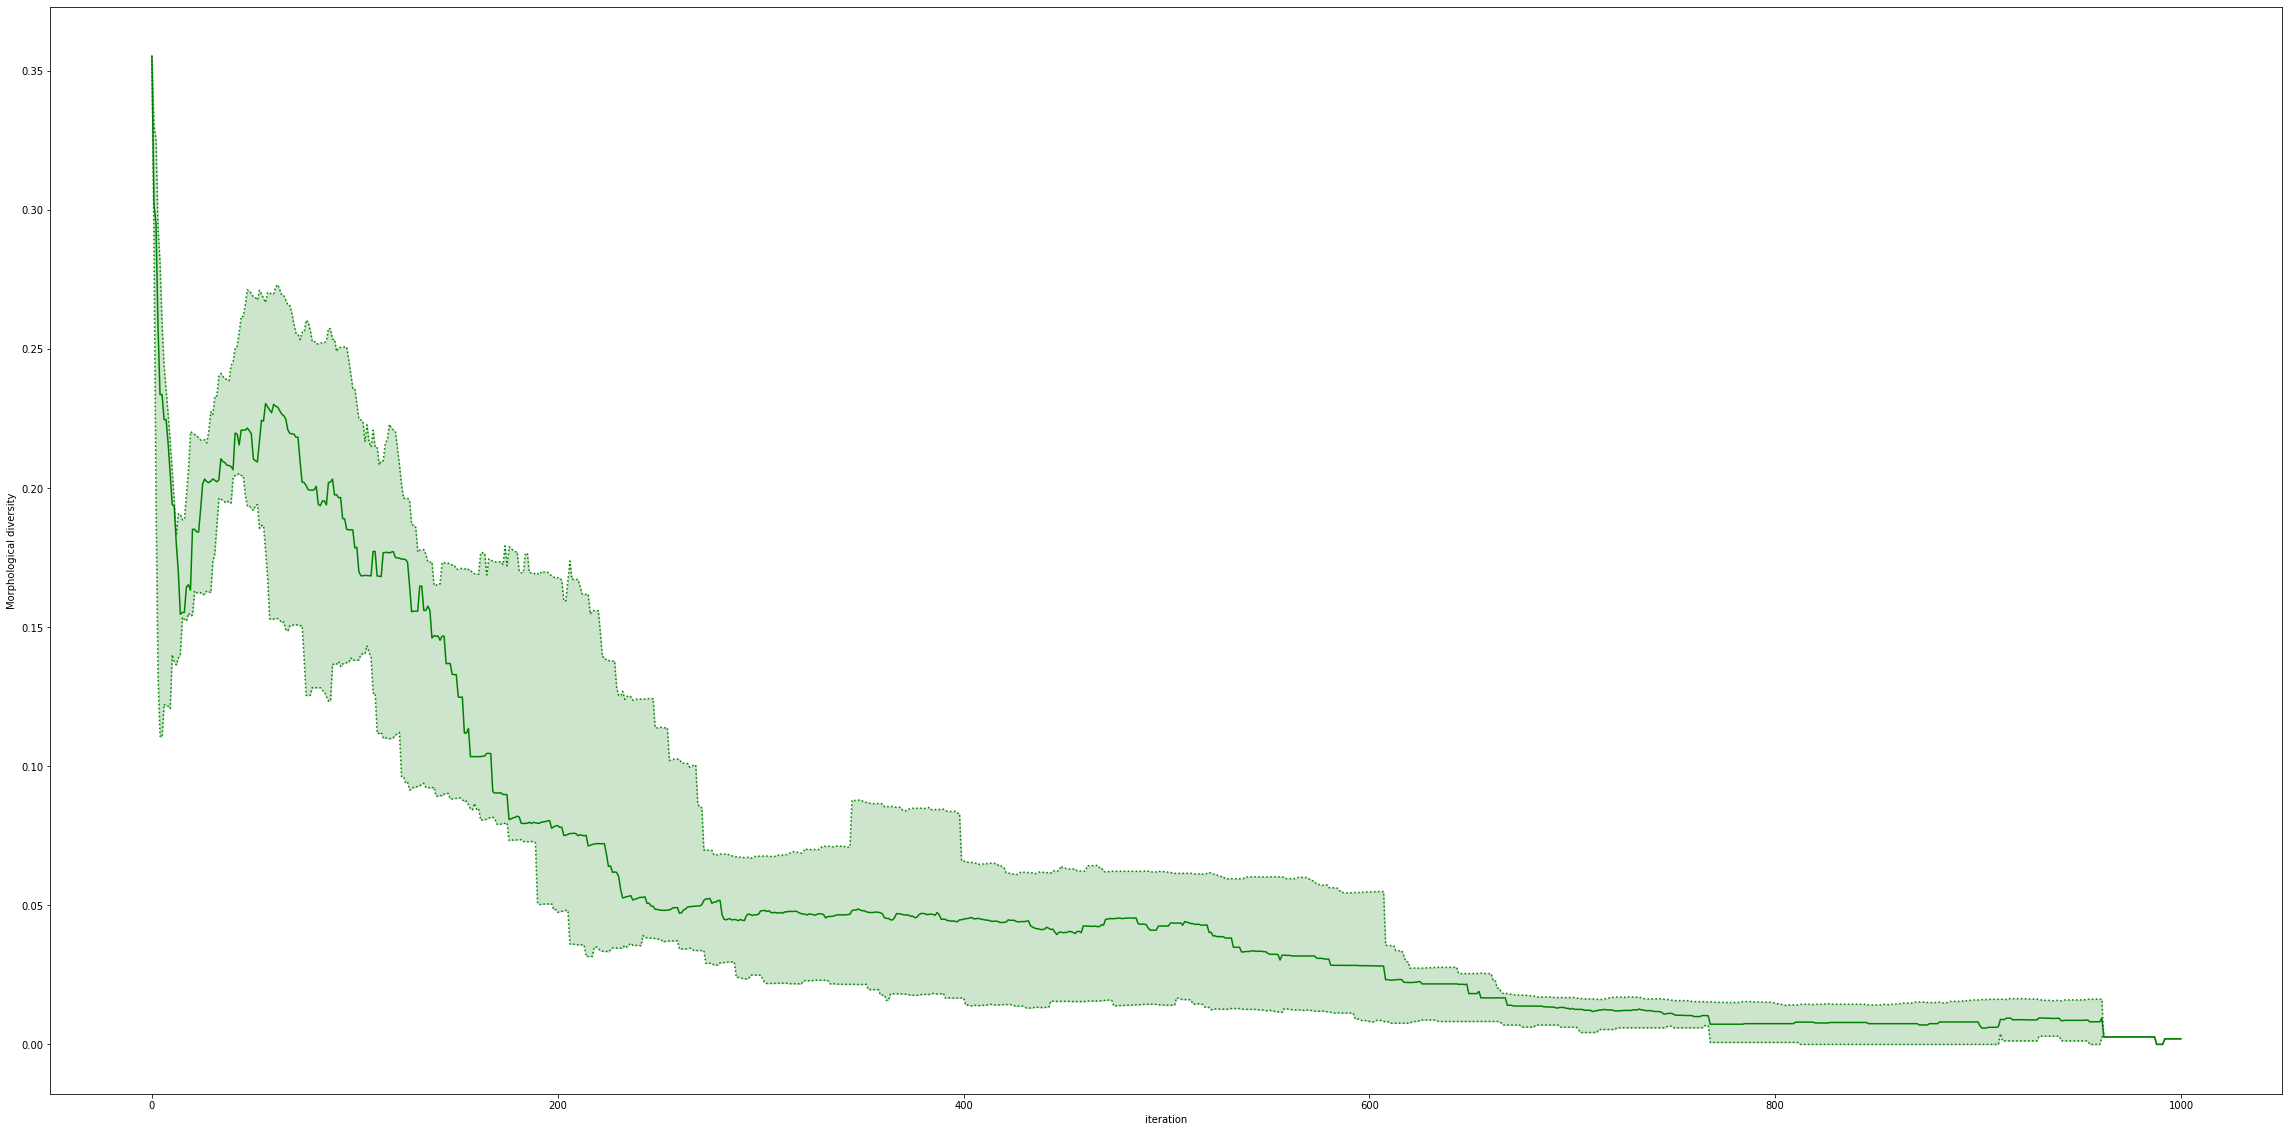

In [75]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological diversity")